# Labs Access Analysis: 03 Metropolitan Area Map Plot

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import json
pd.options.mode.chained_assignment = None
import branca.colormap as cmp
import os
import time
import folium
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# Change the font
sns.set_context("poster", font_scale=1.5)
sns.set_style(style="whitegrid")
matplotlib.rc('font', family='serif', serif='Fira Sans')

In [2]:
url_data_labs = "data/labs.csv"
url_data_isochrones = "data/isochrones.json"

In [3]:
# Load data, json
with open(url_data_isochrones) as json_file:
    data = json.load(json_file)

In [4]:
# Load data, csv
labs = pd.read_csv(url_data_labs)

In [5]:
locations = {}
for i in data:
  locations[i['name']] = i['metadata']['query']['locations'][0]

### Map visualziation

In [6]:
m=folium.Map(location=[41.396721,2.1943200000000003])
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)

In [7]:
for loc in locations:
  folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(m)

In [8]:
m

organize the data

In [9]:
rows = []
for h in data:
  rows.append([h["name"], h["features"][0]["properties"]["total_pop"], h["features"][0]["properties"]["area"], h["features"][0]["properties"]["reachfactor"], h["features"][0]["geometry"]["coordinates"], []])

In [10]:
map_data = pd.DataFrame(rows, columns=['Name', 'total_pop', 'area', 'reachfactor','geometry', 'isochrone'])
map_data.head()

Name  total_pop        area  reachfactor  \
0          Fab Lab Barcelona    90862.0  4444783.82       0.9055   
1  MADE Makerspace Barcelona    87403.0  4378946.71       0.8921   
2                  Soko Tech    91433.0  4353937.57       0.8870   
3                  LSCongres    95371.0  4497971.38       0.9163   
4              Green Fab Lab       49.0   845558.02       0.1723   

                                            geometry isochrone  
0  [[[2.181516, 41.395308], [2.181969, 41.39116],...        []  
1  [[[2.127469, 41.374827], [2.128559, 41.368987]...        []  
2  [[[2.174851, 41.424714], [2.174888, 41.423775]...        []  
3  [[[2.167014, 41.427727], [2.16735, 41.426536],...        []  
4  [[[2.126857, 41.450915], [2.12691, 41.450127],...        []

create a flip isochrone cell for each lab

In [11]:
for ind in map_data.index:
     row_iso = []
     for coords in map_data['geometry'][ind][0]:
       row_iso.append([coords[1], coords[0], 900])
     map_data.at[ind, 'isochrone'] = row_iso

In [12]:
map_data.set_index('Name', inplace=True)
labs.set_index('Name', inplace=True)

add colums from the csv file (the labs) to the json file (the isochrones)

In [13]:
full_map_data = map_data.join(labs)

In [14]:
full_map_data

total_pop        area  \
Name                                                                        
Fab Lab Barcelona                                     90862.0  4444783.82   
MADE Makerspace Barcelona                             87403.0  4378946.71   
Soko Tech                                             91433.0  4353937.57   
LSCongres                                             95371.0  4497971.38   
Green Fab Lab                                            49.0   845558.02   
...                                                       ...         ...   
Fundació Avismón                                      94273.0  4519695.39   
Elisava, Barcelona School of Design and Enginee...    76997.0  4633944.78   
HP 3D Printing and Digital Manufacturing Center...     3788.0  1465651.52   
3D Incubator                                          25847.0  1257375.86   
Fundació CIM                                          77885.0  4005050.79   

                                                    reachfactor  \
Name                                                              
Fab Lab Barcelona                                        0.9055   
MADE Makerspace Barcelona                                0.8921   
Soko Tech                                                0.8870   
LSCongres                                                0.9163   
Green Fab Lab                                            0.1723   
...                                                         ...   
Fundació Avismón                                         0.9207   
Elisava, Barcelona School of Design and Enginee...       0.9440   
HP 3D Printing and Digital Manufacturing Center...       0.2986   
3D Incubator                                             0.2562   
Fundació CIM                                             0.8159   

                                                                                             geometry  \
Name                                                                                                    
Fab Lab Barcelona                                   [[[2.181516, 41.395308], [2.181969, 41.39116],...   
MADE Makerspace Barcelona                           [[[2.127469, 41.374827], [2.128559, 41.368987]...   
Soko Tech                                           [[[2.174851, 41.424714], [2.174888, 41.423775]...   
LSCongres                                           [[[2.167014, 41.427727], [2.16735, 41.426536],...   
Green Fab Lab                                       [[[2.126857, 41.450915], [2.12691, 41.450127],...   
...                                                                                               ...   
Fundació Avismón                                    [[[2.121454, 41.37487], [2.121459, 41.374771],...   
Elisava, Barcelona School of Design and Enginee...  [[[2.163237, 41.37815], [2.163361, 41.375385],...   
HP 3D Printing and Digital Manufacturing Center...  [[[2.052279, 41.492124], [2.052314, 41.491766]...   
3D Incubator                                        [[[2.109858, 41.336682], [2.111475, 41.334295]...   
Fundació CIM                                        [[[2.102801, 41.384278], [2.102817, 41.382747]...   

                                                                                            isochrone  \
Name                                                                                                    
Fab Lab Barcelona                                   [[41.395308, 2.181516, 900], [41.39116, 2.1819...   
MADE Makerspace Barcelona                           [[41.374827, 2.127469, 900], [41.368987, 2.128...   
Soko Tech                                           [[41.424714, 2.174851, 900], [41.423775, 2.174...   
LSCongres                                           [[41.427727, 2.167014, 900], [41.426536, 2.167...   
Green Fab Lab                                       [[41.450915, 2.126857, 900], [41.450127, 2.126...   
...                                                                          

Transform the areas in square km


In [15]:
map_data["area"] = map_data["area"] / 1000000.0

In [16]:
map_data["area"].head()

Name
Fab Lab Barcelona            4.444784
MADE Makerspace Barcelona    4.378947
Soko Tech                    4.353938
LSCongres                    4.497971
Green Fab Lab                0.845558
Name: area, dtype: float64

### Population reached

plot the data

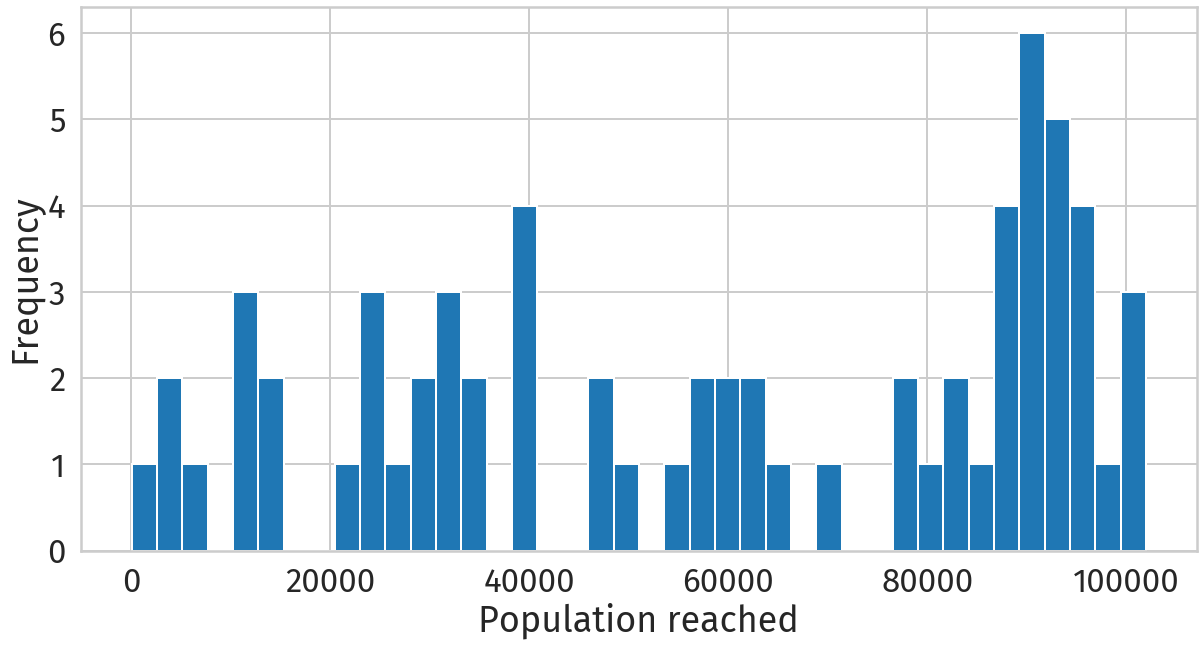

In [17]:
map_data["total_pop"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Population reached')
plt.savefig("svg" + os.sep + "labs_population_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_population_hist.png", dpi=300, bbox_inches="tight")

plot the data of the population reached by each lab

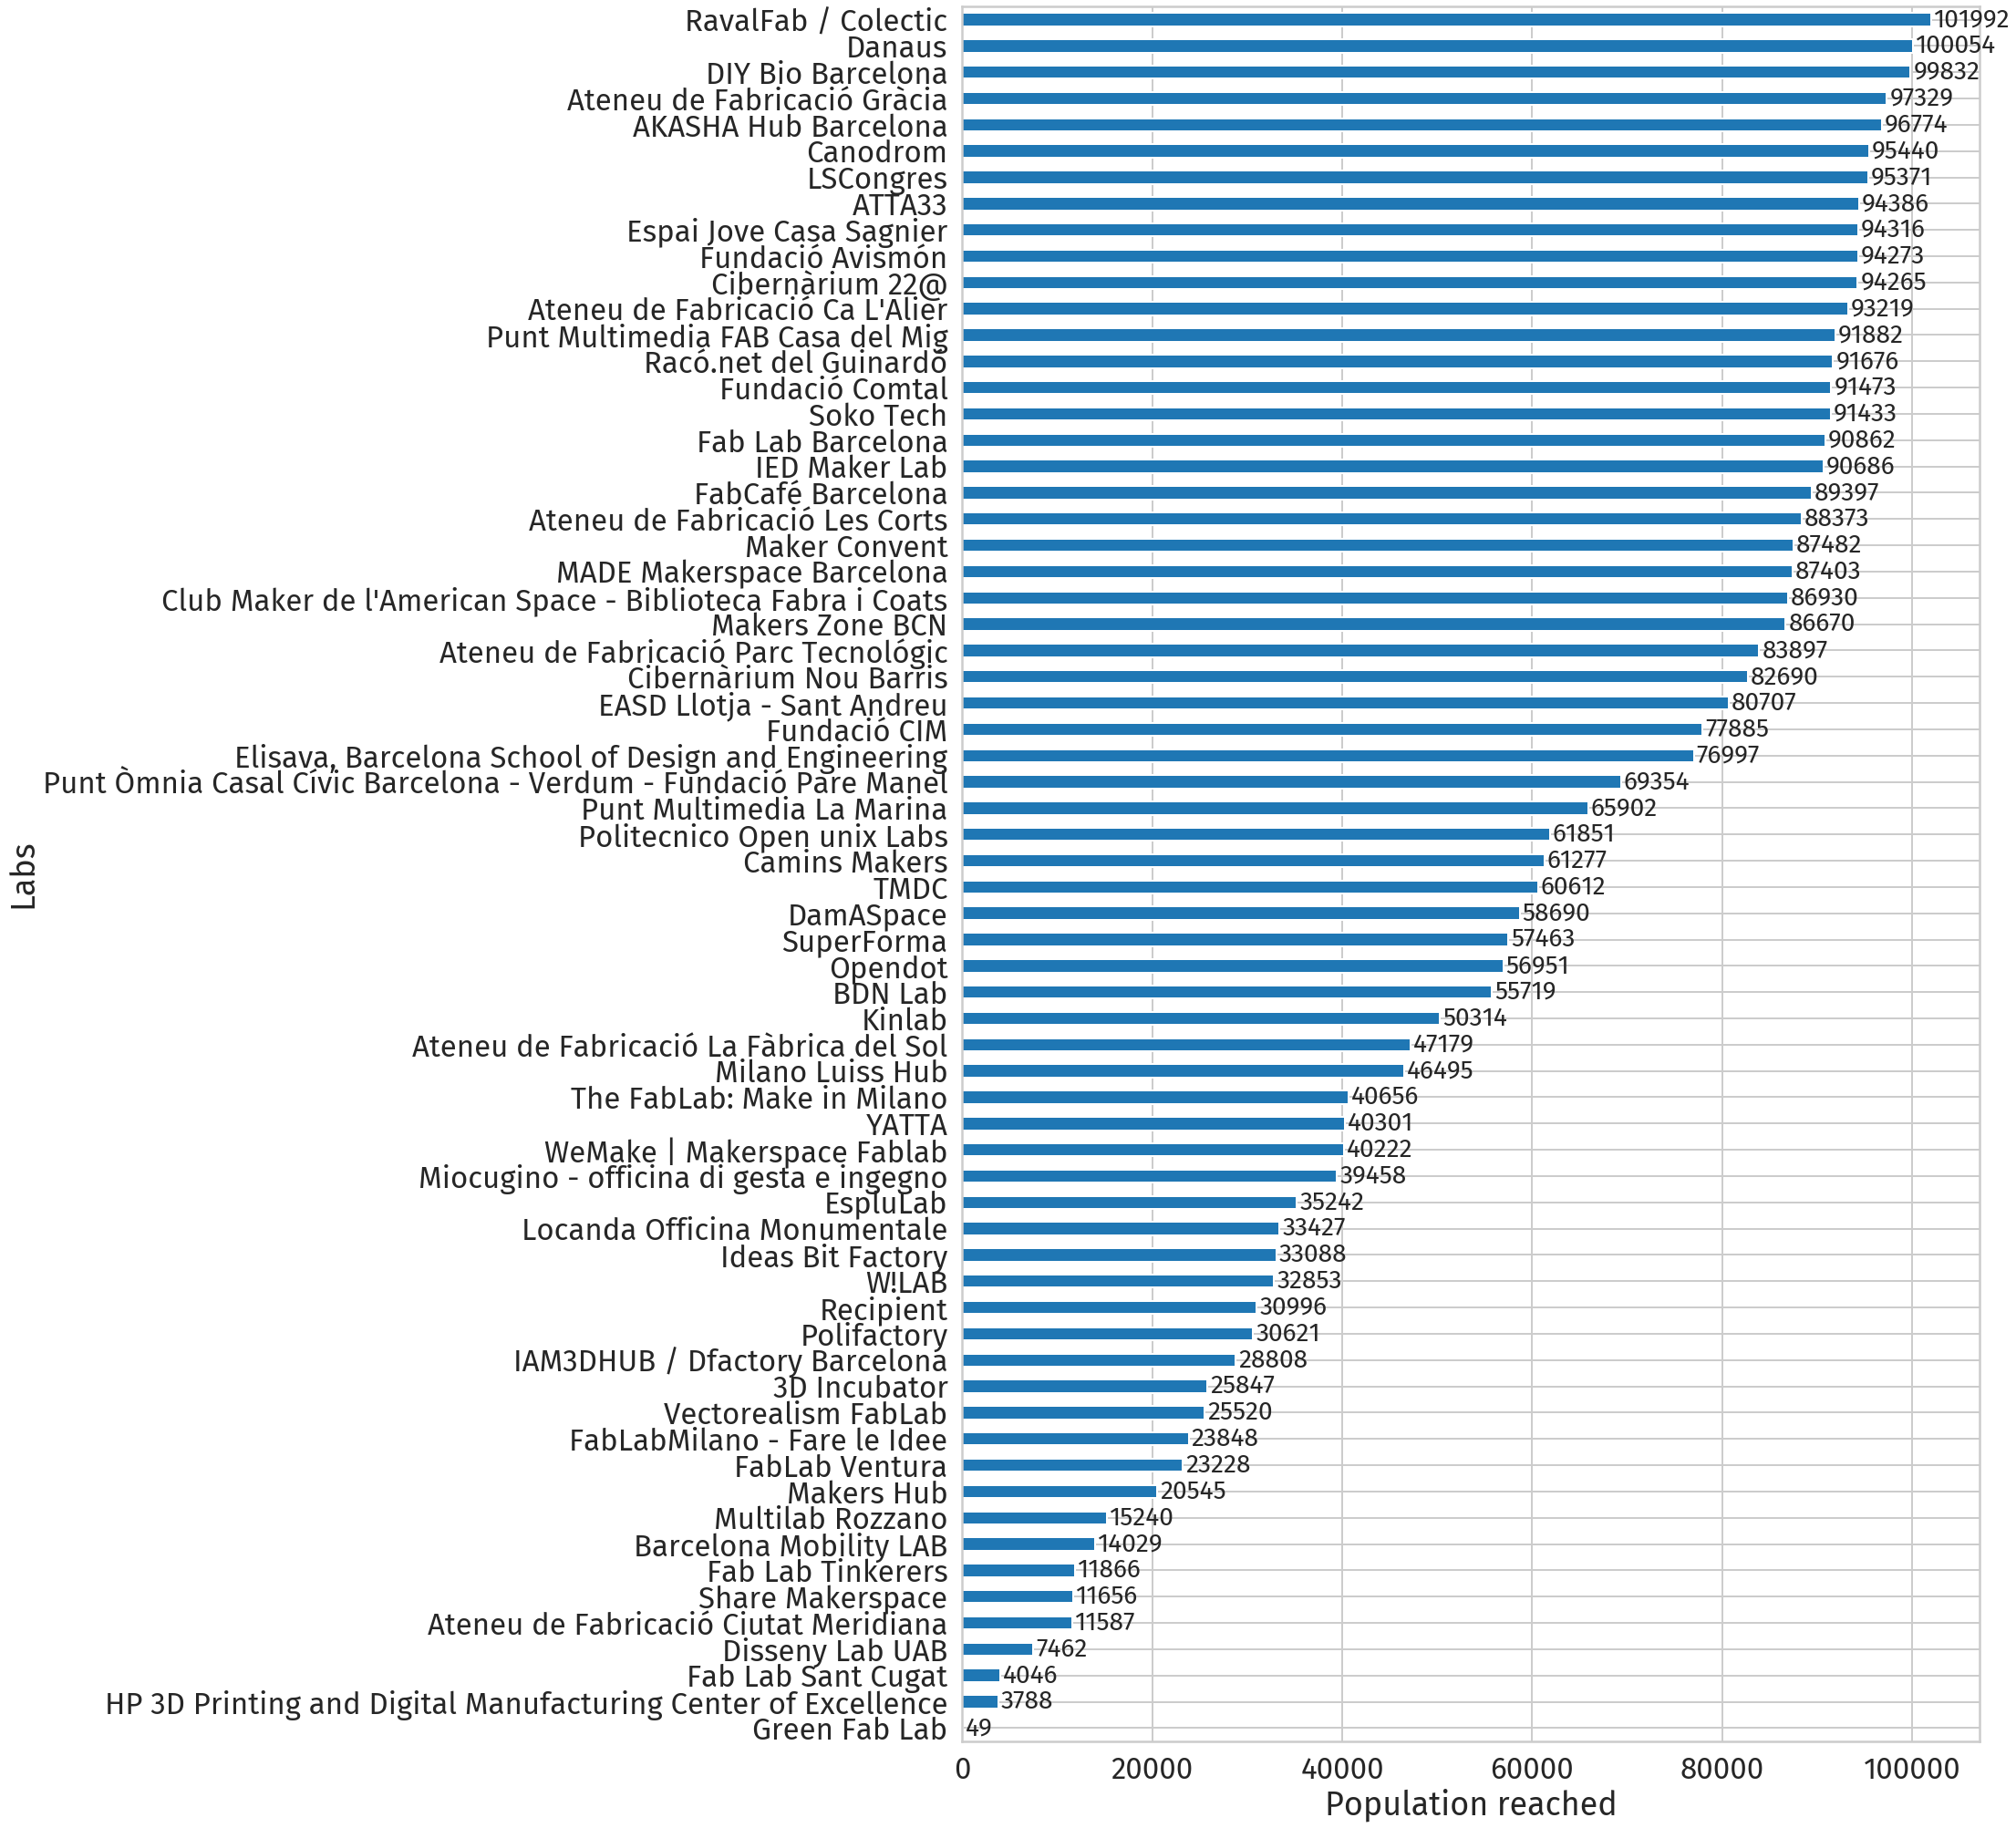

In [18]:
ax = map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind="barh", figsize=(20,35))
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_population_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_population_bar.png", dpi=300, bbox_inches="tight")

### Area reached

Plot the data

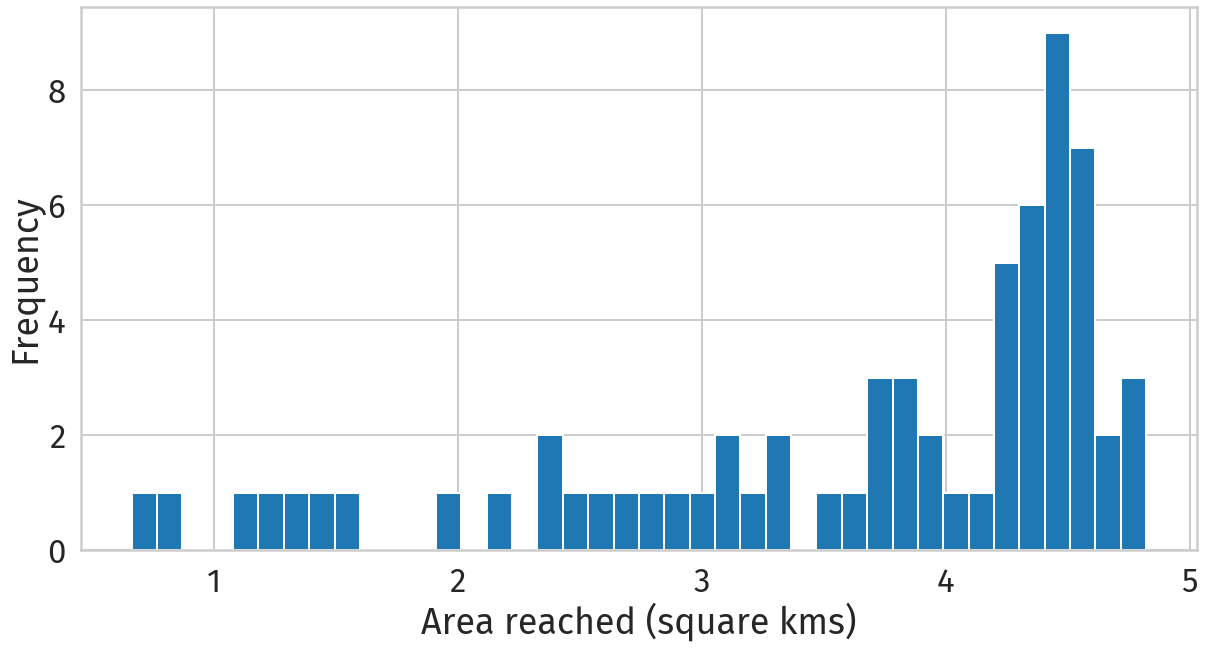

In [19]:
map_data["area"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Area reached (square kms)')
plt.savefig("svg" + os.sep + "labs_area_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_area_hist.png", dpi=300, bbox_inches="tight")

Plot the data of the area reached by each lab

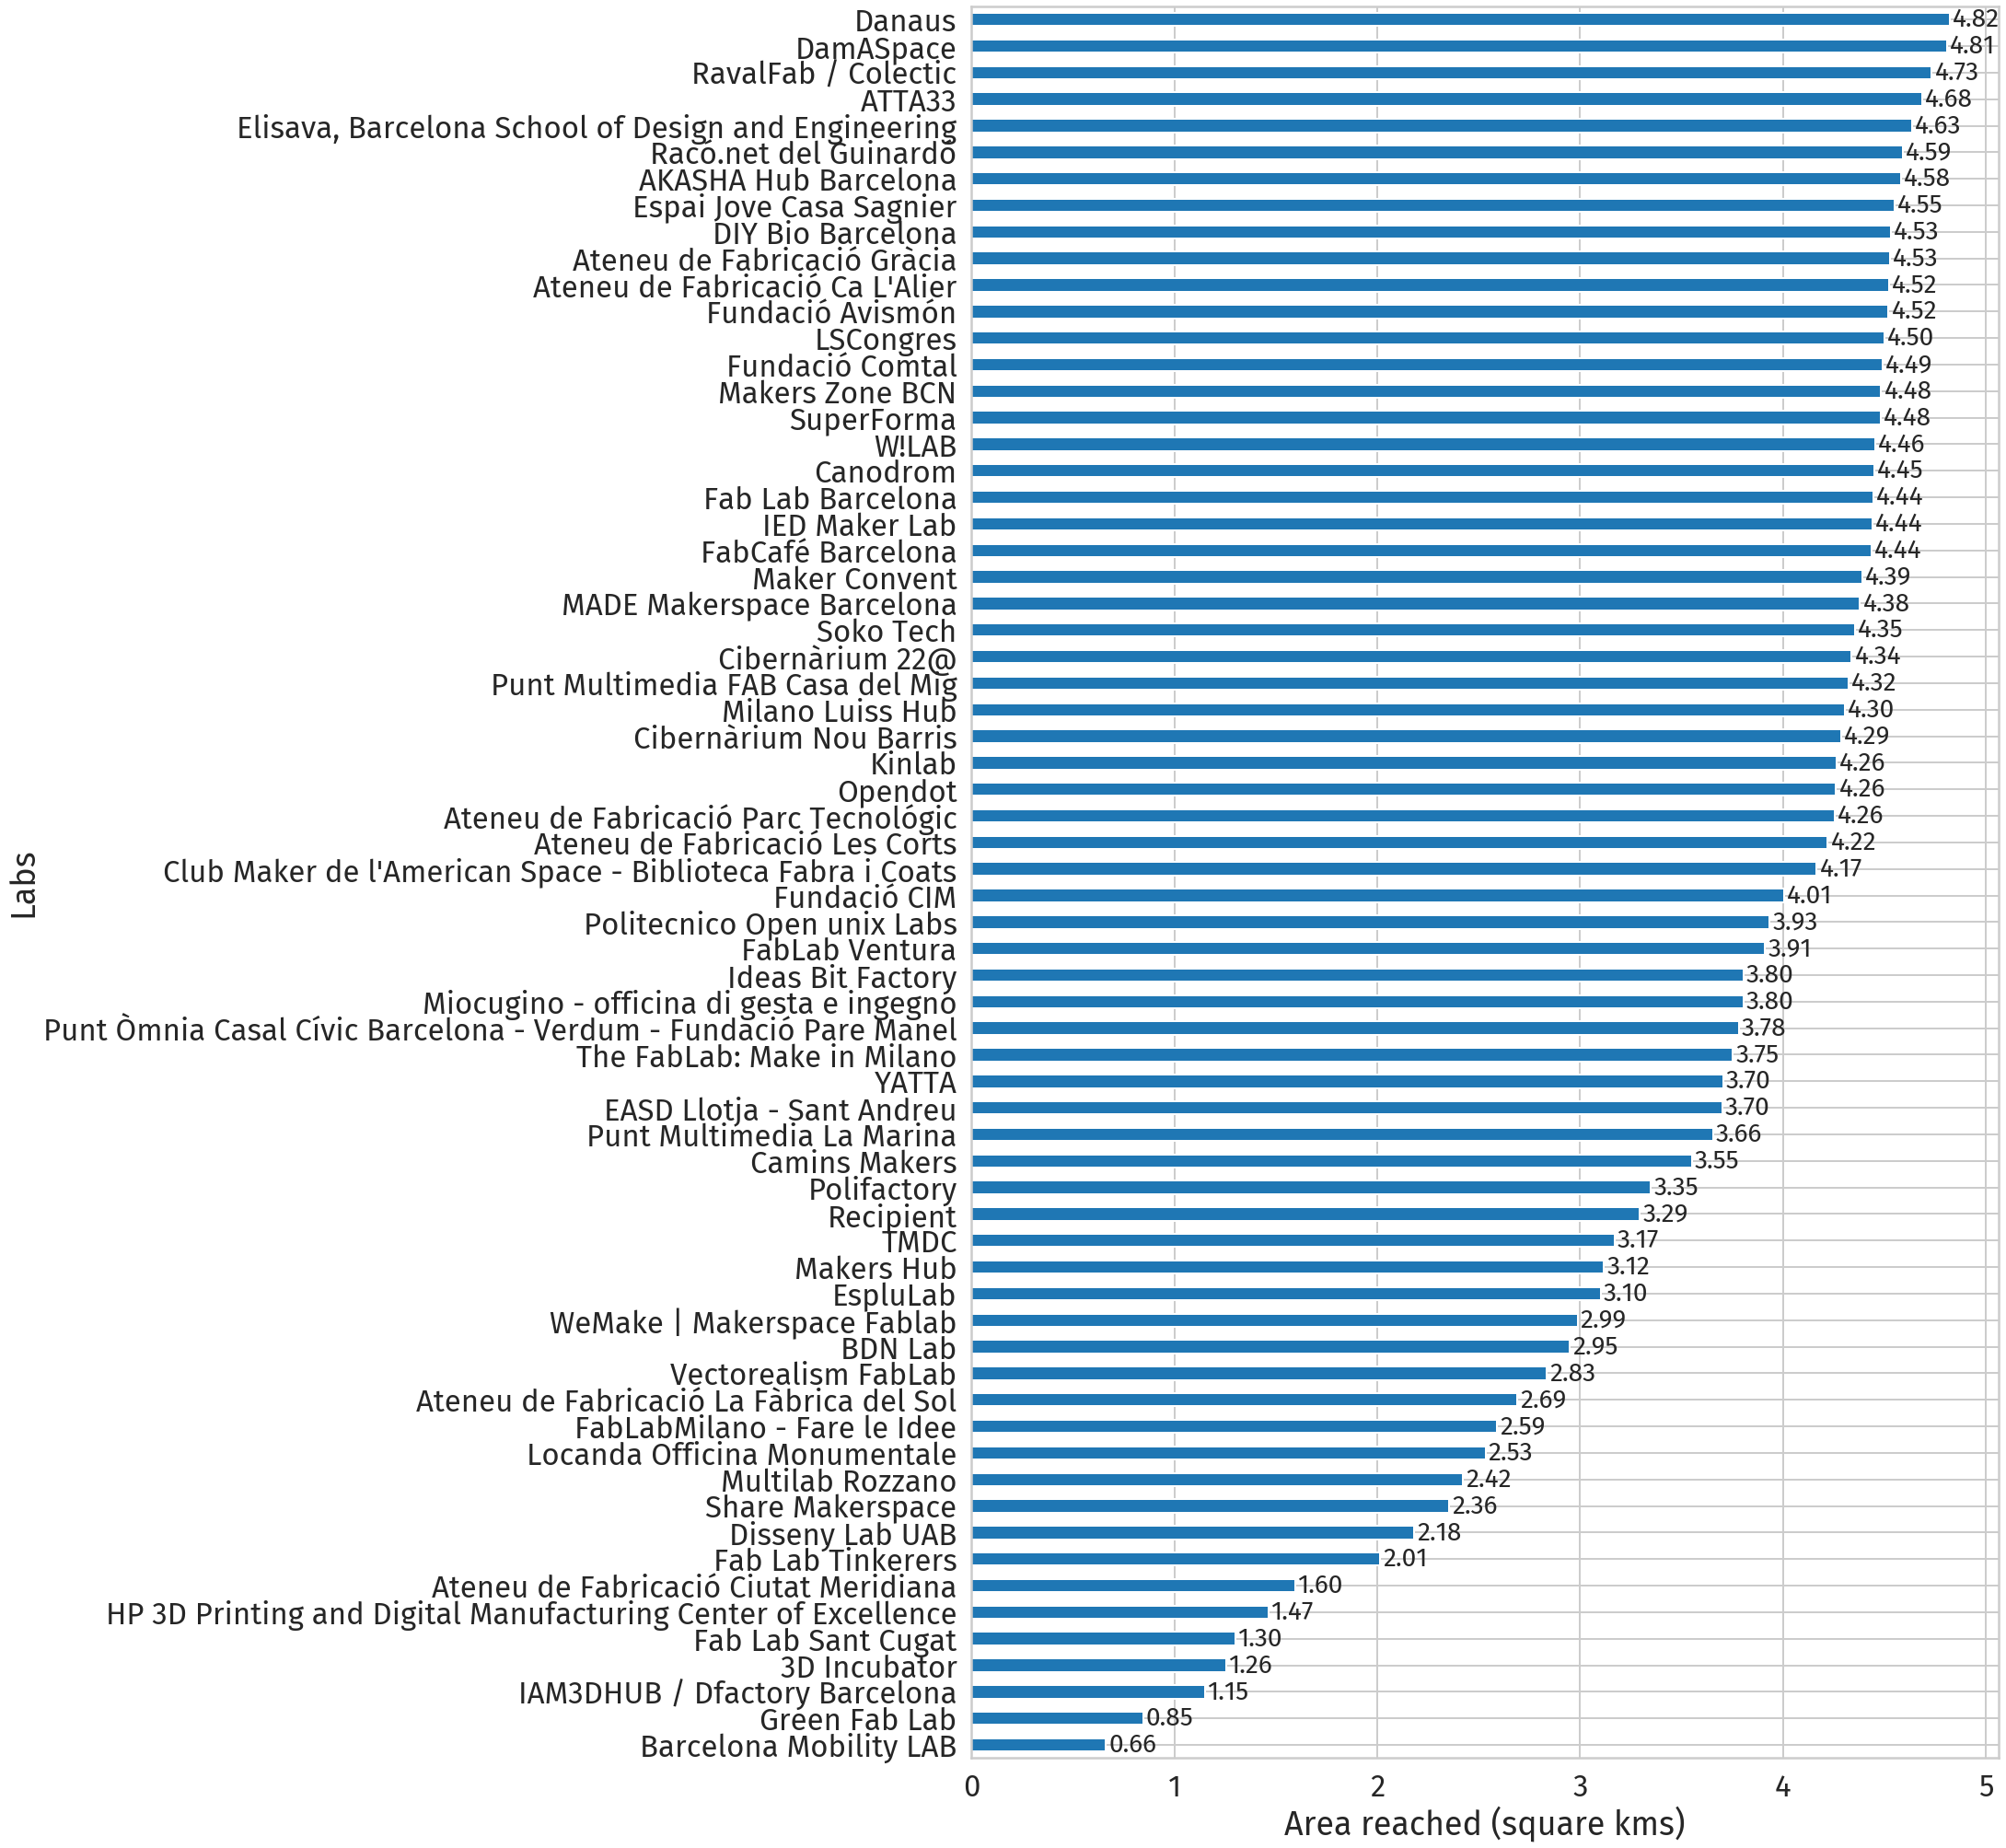

In [20]:
ax = map_data.sort_values(by=['area'])['area'].plot(kind="barh", figsize=(20,35))
ax.bar_label(ax.containers[0], fmt="%.2f", size=28, padding=3)
plt.xlabel('Area reached (square kms)')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_area_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_area_bar.png", dpi=300, bbox_inches="tight")

### Reach Factor

Plot the data

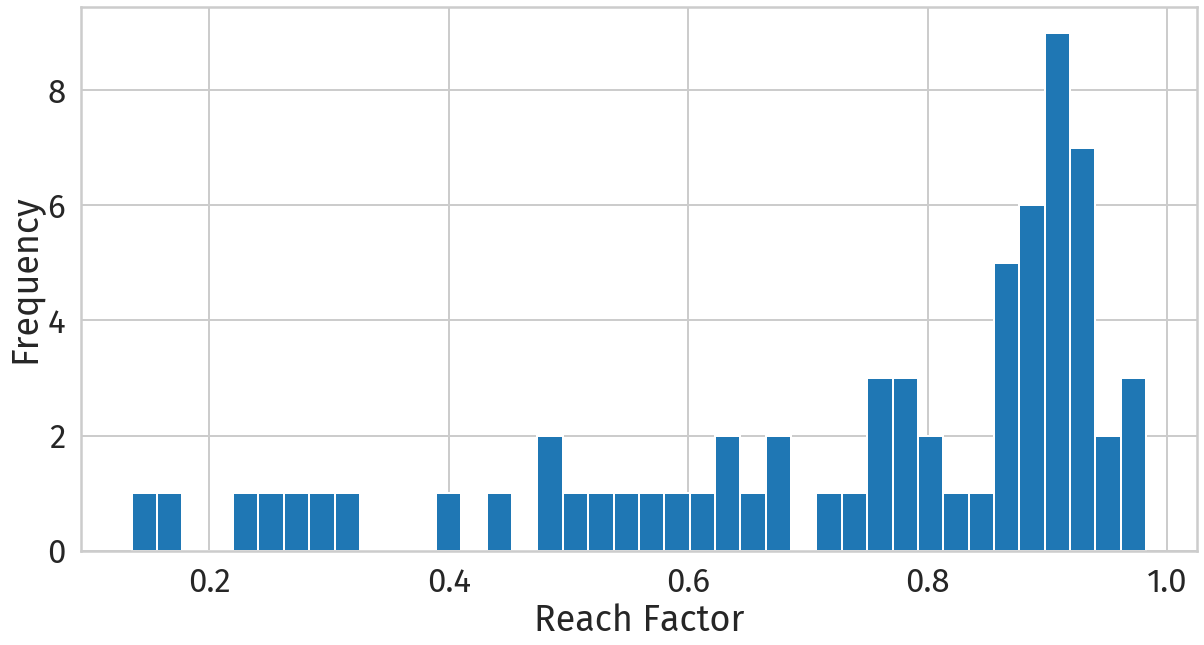

In [21]:
map_data["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Reach Factor')
plt.savefig("svg" + os.sep + "labs_reachfactor_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_reachfactor_hist.png", dpi=300, bbox_inches="tight")

plot the data of the reach factor for each lab

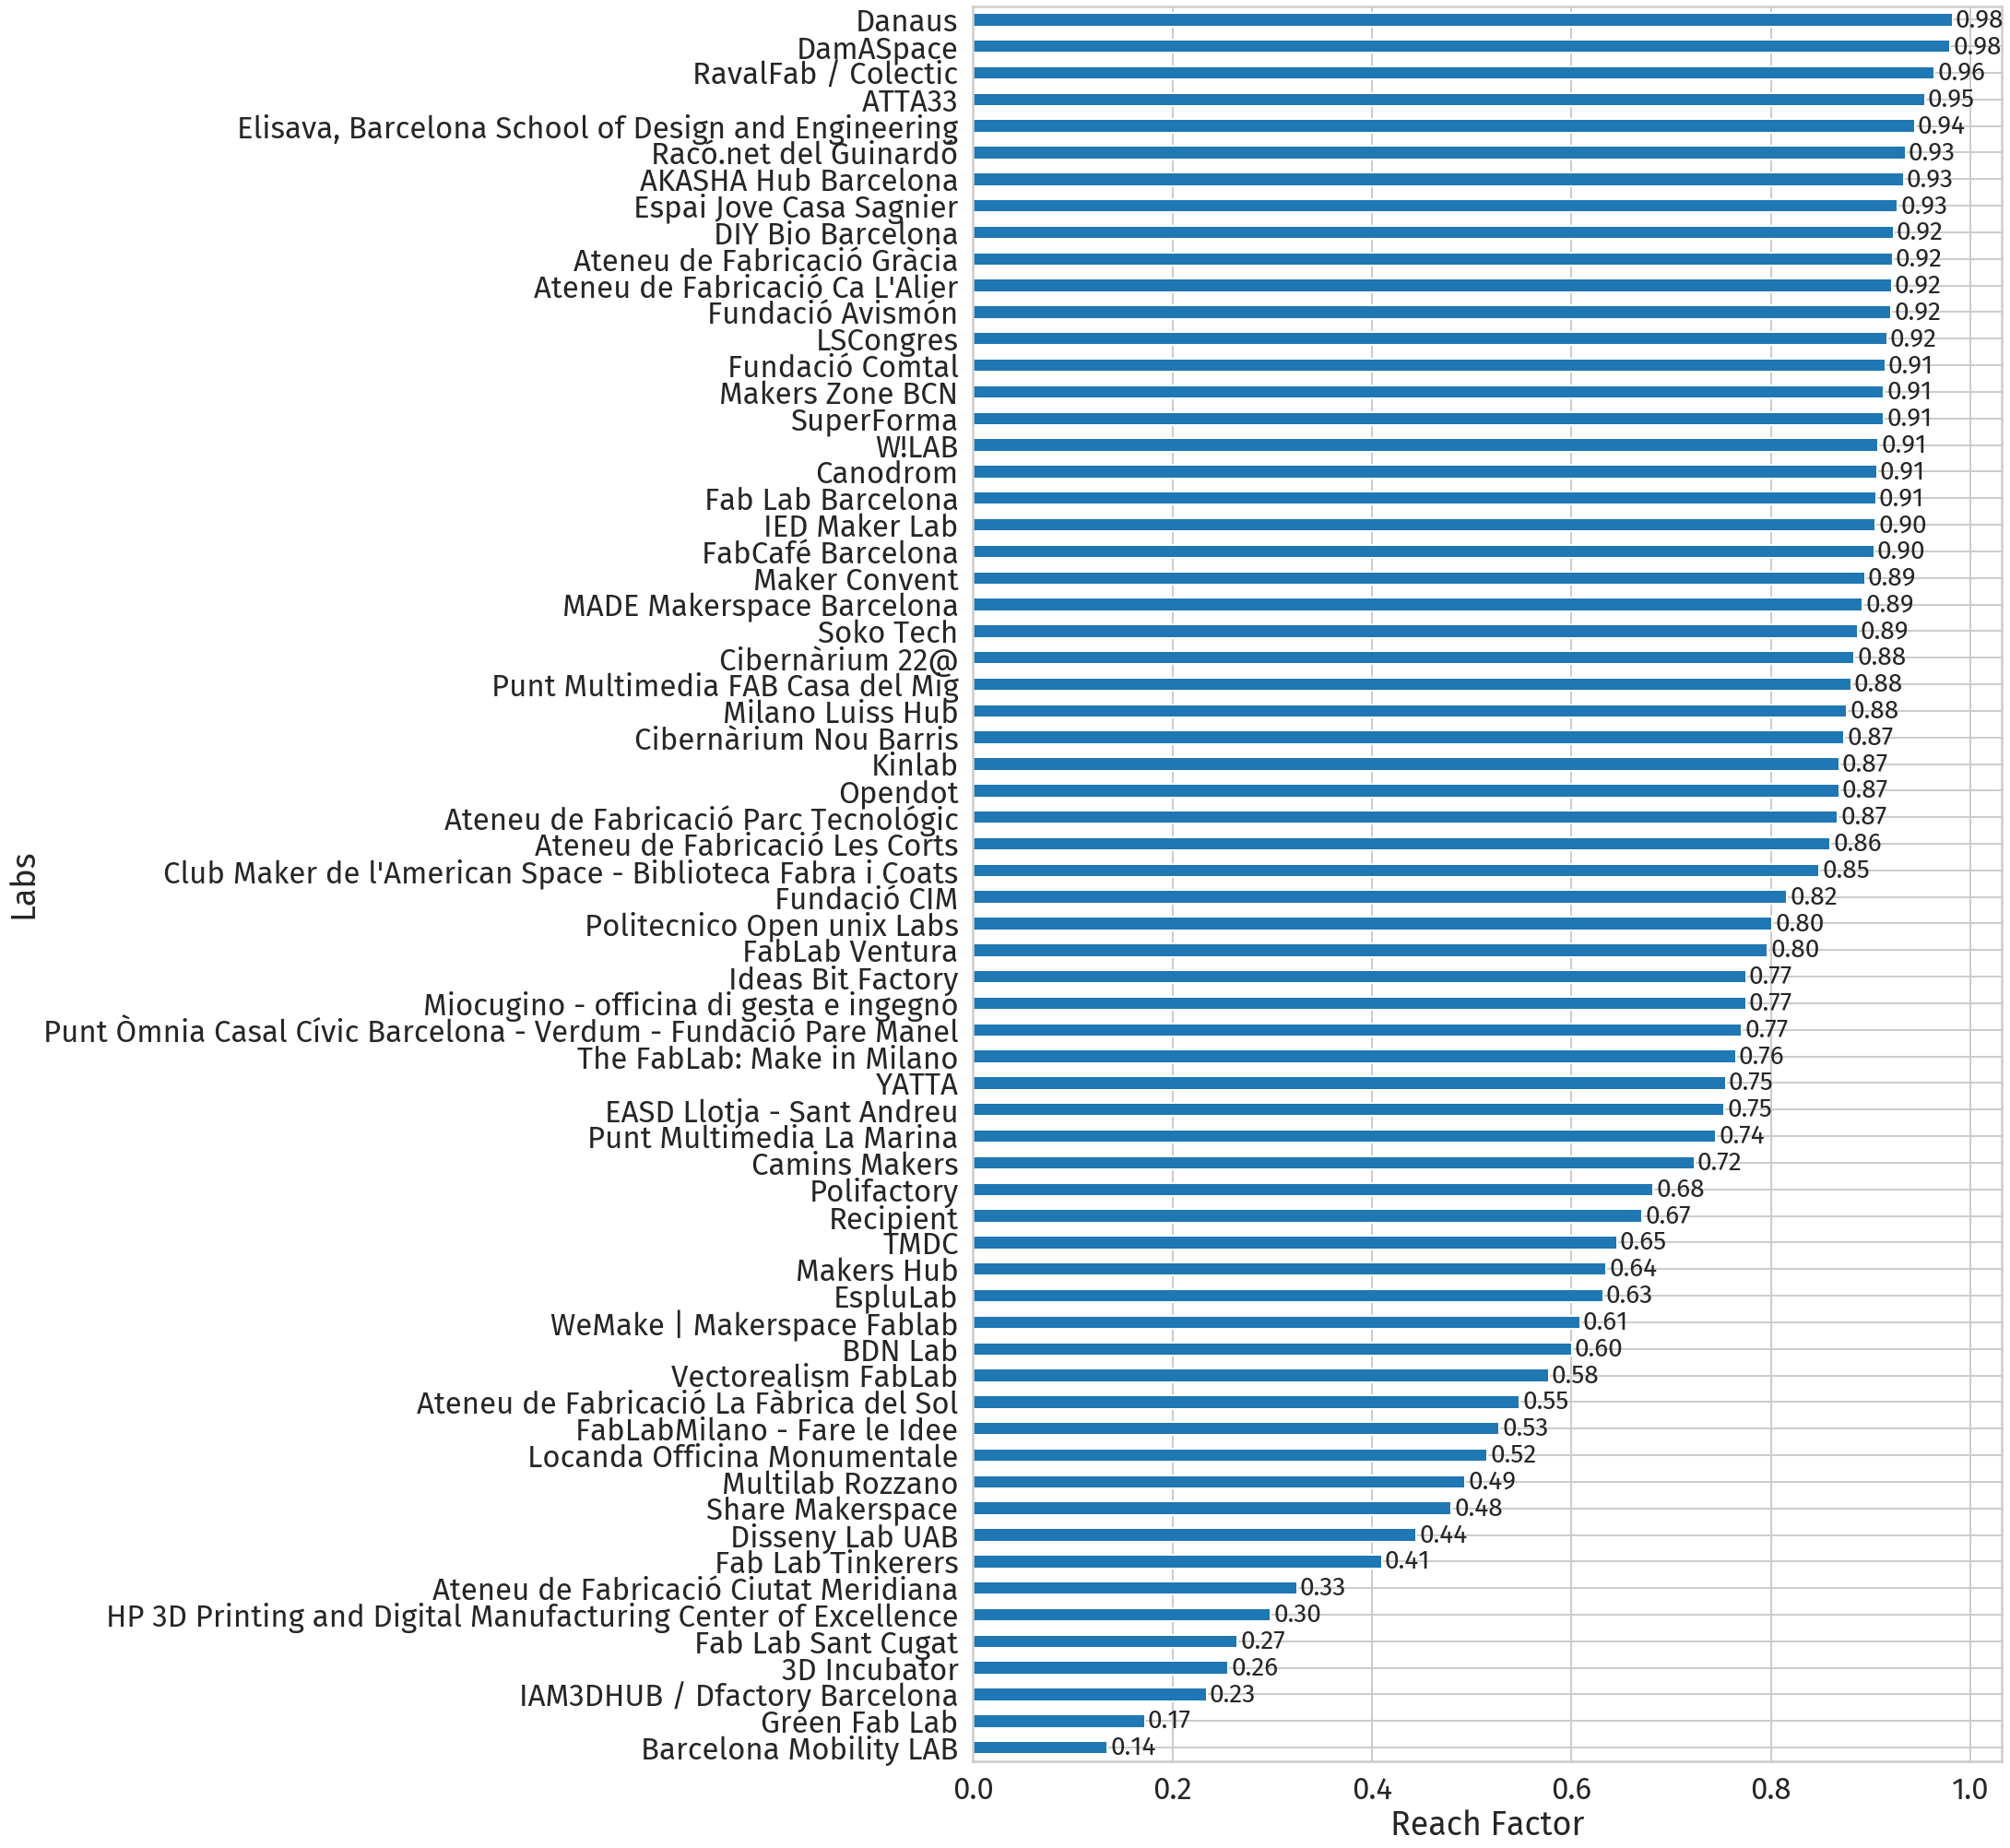

In [22]:
ax = map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind="barh", figsize=(20,35))
ax.bar_label(ax.containers[0], fmt="%.2f", size=28, padding=3)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_reachfactor_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_reachfactor_bar.png", dpi=300, bbox_inches="tight")

### Labs values clustered by city

In [23]:
full_map_data.groupby(["Cluster","Type"]).size()

Cluster  Type                         
BCN      Ateneu de Fabricació              6
         City Space                        7
         DIYBio Lab                        1
         Fab Lab                          11
         FabCafé                           1
         Foundation                        2
         Hackerspace                       2
         Incubator/Accelerator             4
         Industry R&D Lab                  1
         Library                           1
         Makerspace                        3
         Service                           1
         University + Industry R&D Lab     1
         University Lab                    5
MI       DIYBio Lab                        1
         Fab Lab                           7
         Hackerspace                       1
         Incubator/Accelerator             1
         Makerspace                        6
         Service                           3
         University Lab                    1
dtype: int64

In [24]:
full_map_data.groupby("Cluster")["total_pop"].sum()

Cluster
BCN    3169314.0
MI      740570.0
Name: total_pop, dtype: float64

In [25]:
full_map_data.groupby("Cluster")["total_pop"].describe()

count          mean           std      min      25%      50%  \
Cluster                                                                 
BCN       46.0  68898.130435  32734.773458     49.0  49314.0  86800.0   
MI        20.0  37028.500000  14865.570627  11656.0  25102.0  36442.5   

              75%       max  
Cluster                      
BCN      92884.75  101992.0  
MI       47449.75   61851.0

In [26]:
full_map_data.groupby("Cluster")["area"].sum()

Cluster
BCN    1.681699e+08
MI     7.051205e+07
Name: area, dtype: float64

In [27]:
full_map_data.groupby("Cluster")["area"].describe()

count          mean           std         min           25%  \
Cluster                                                                
BCN       46.0  3.655868e+06  1.243028e+06   663848.58  3.117853e+06   
MI        20.0  3.525602e+06  7.349225e+05  2355878.41  2.948632e+06   

                50%           75%         max  
Cluster                                        
BCN      4330114.79  4.495601e+06  4821324.40  
MI       3728716.28  4.015221e+06  4808370.81

In [28]:
full_map_data.groupby("Cluster")["reachfactor"].describe()

count      mean       std     min      25%     50%       75%     max
Cluster                                                                      
BCN       46.0  0.744763  0.253217  0.1352  0.63515  0.8821  0.915825  0.9822
MI        20.0  0.718230  0.149725  0.4799  0.60070  0.7596  0.818000  0.9796

plot the data

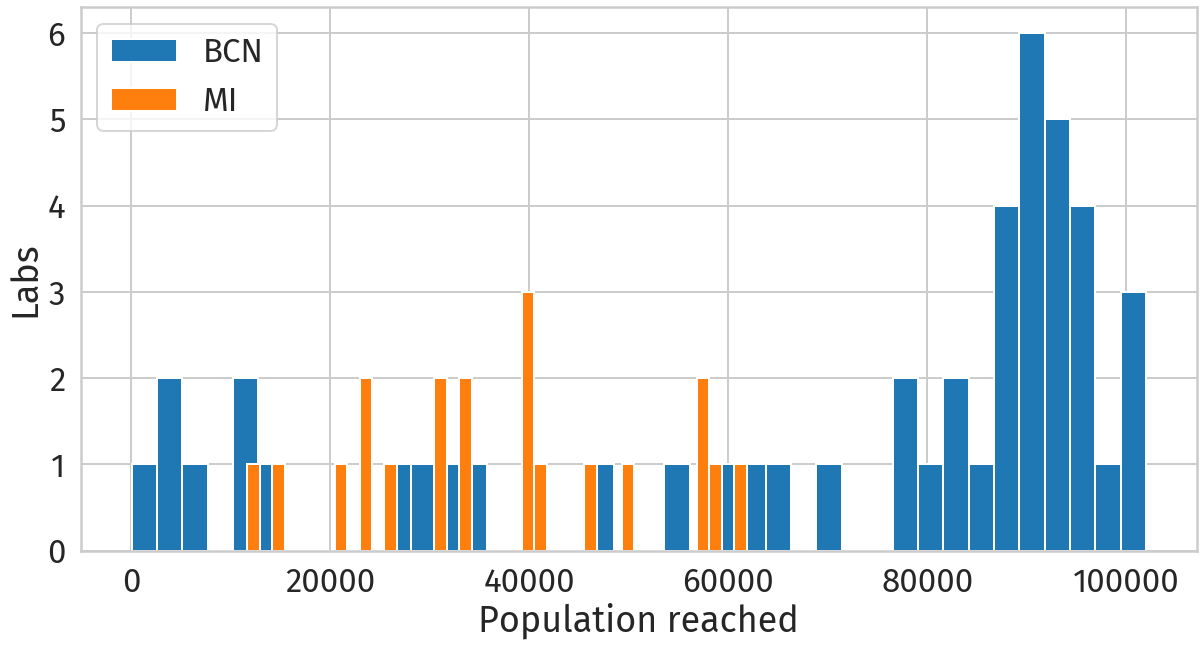

In [29]:
full_map_data.groupby("Cluster")["total_pop"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_population_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_population_grouped_hist.png", dpi=300, bbox_inches="tight")

plot the data for each lab

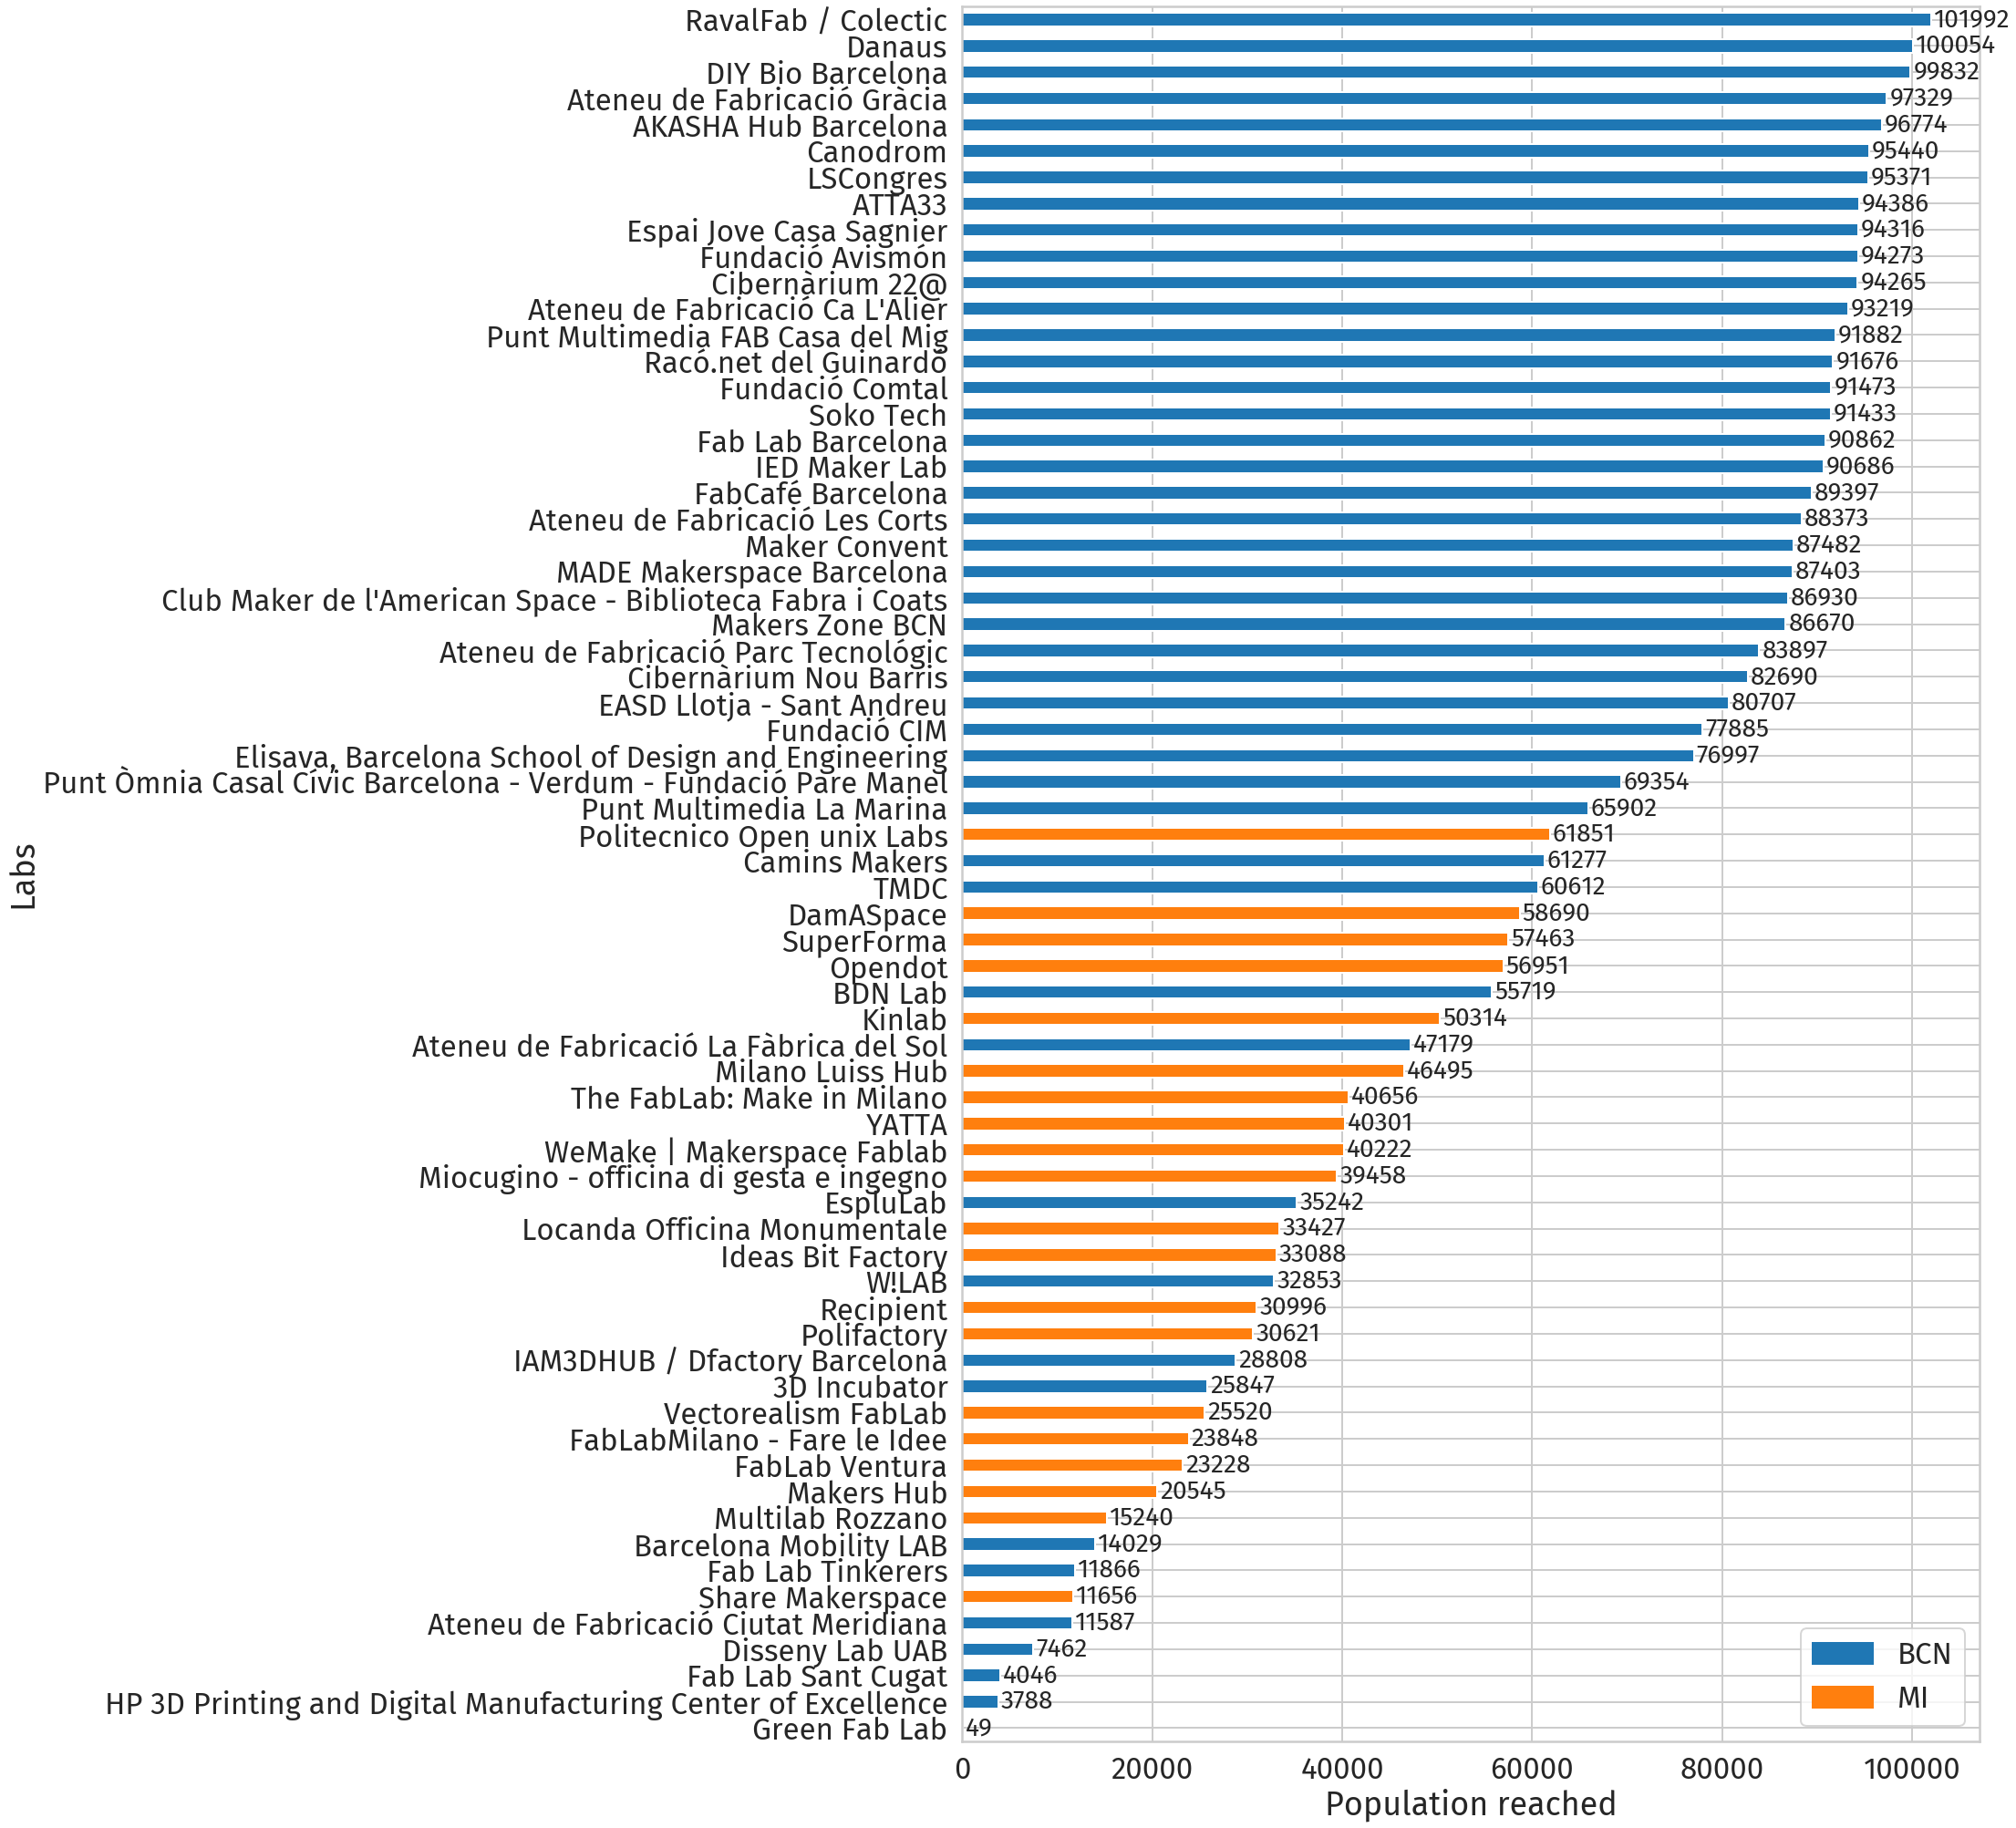

In [30]:
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['total_pop'])['Cluster']], figsize=(20,35), legend=True)
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_population_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_population_grouped_bar.png", dpi=300, bbox_inches="tight")

plot the data

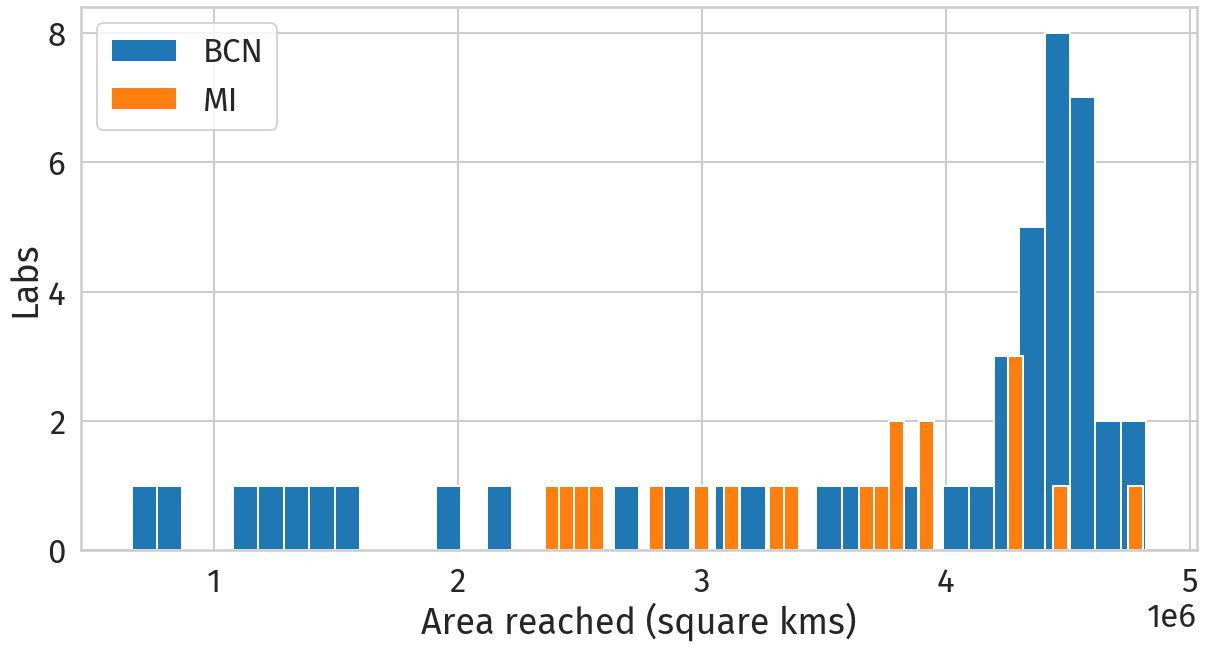

In [31]:
full_map_data.groupby("Cluster")["area"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Area reached (square kms)')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_area_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_area_grouped_hist.png", dpi=300, bbox_inches="tight")

plot the data 

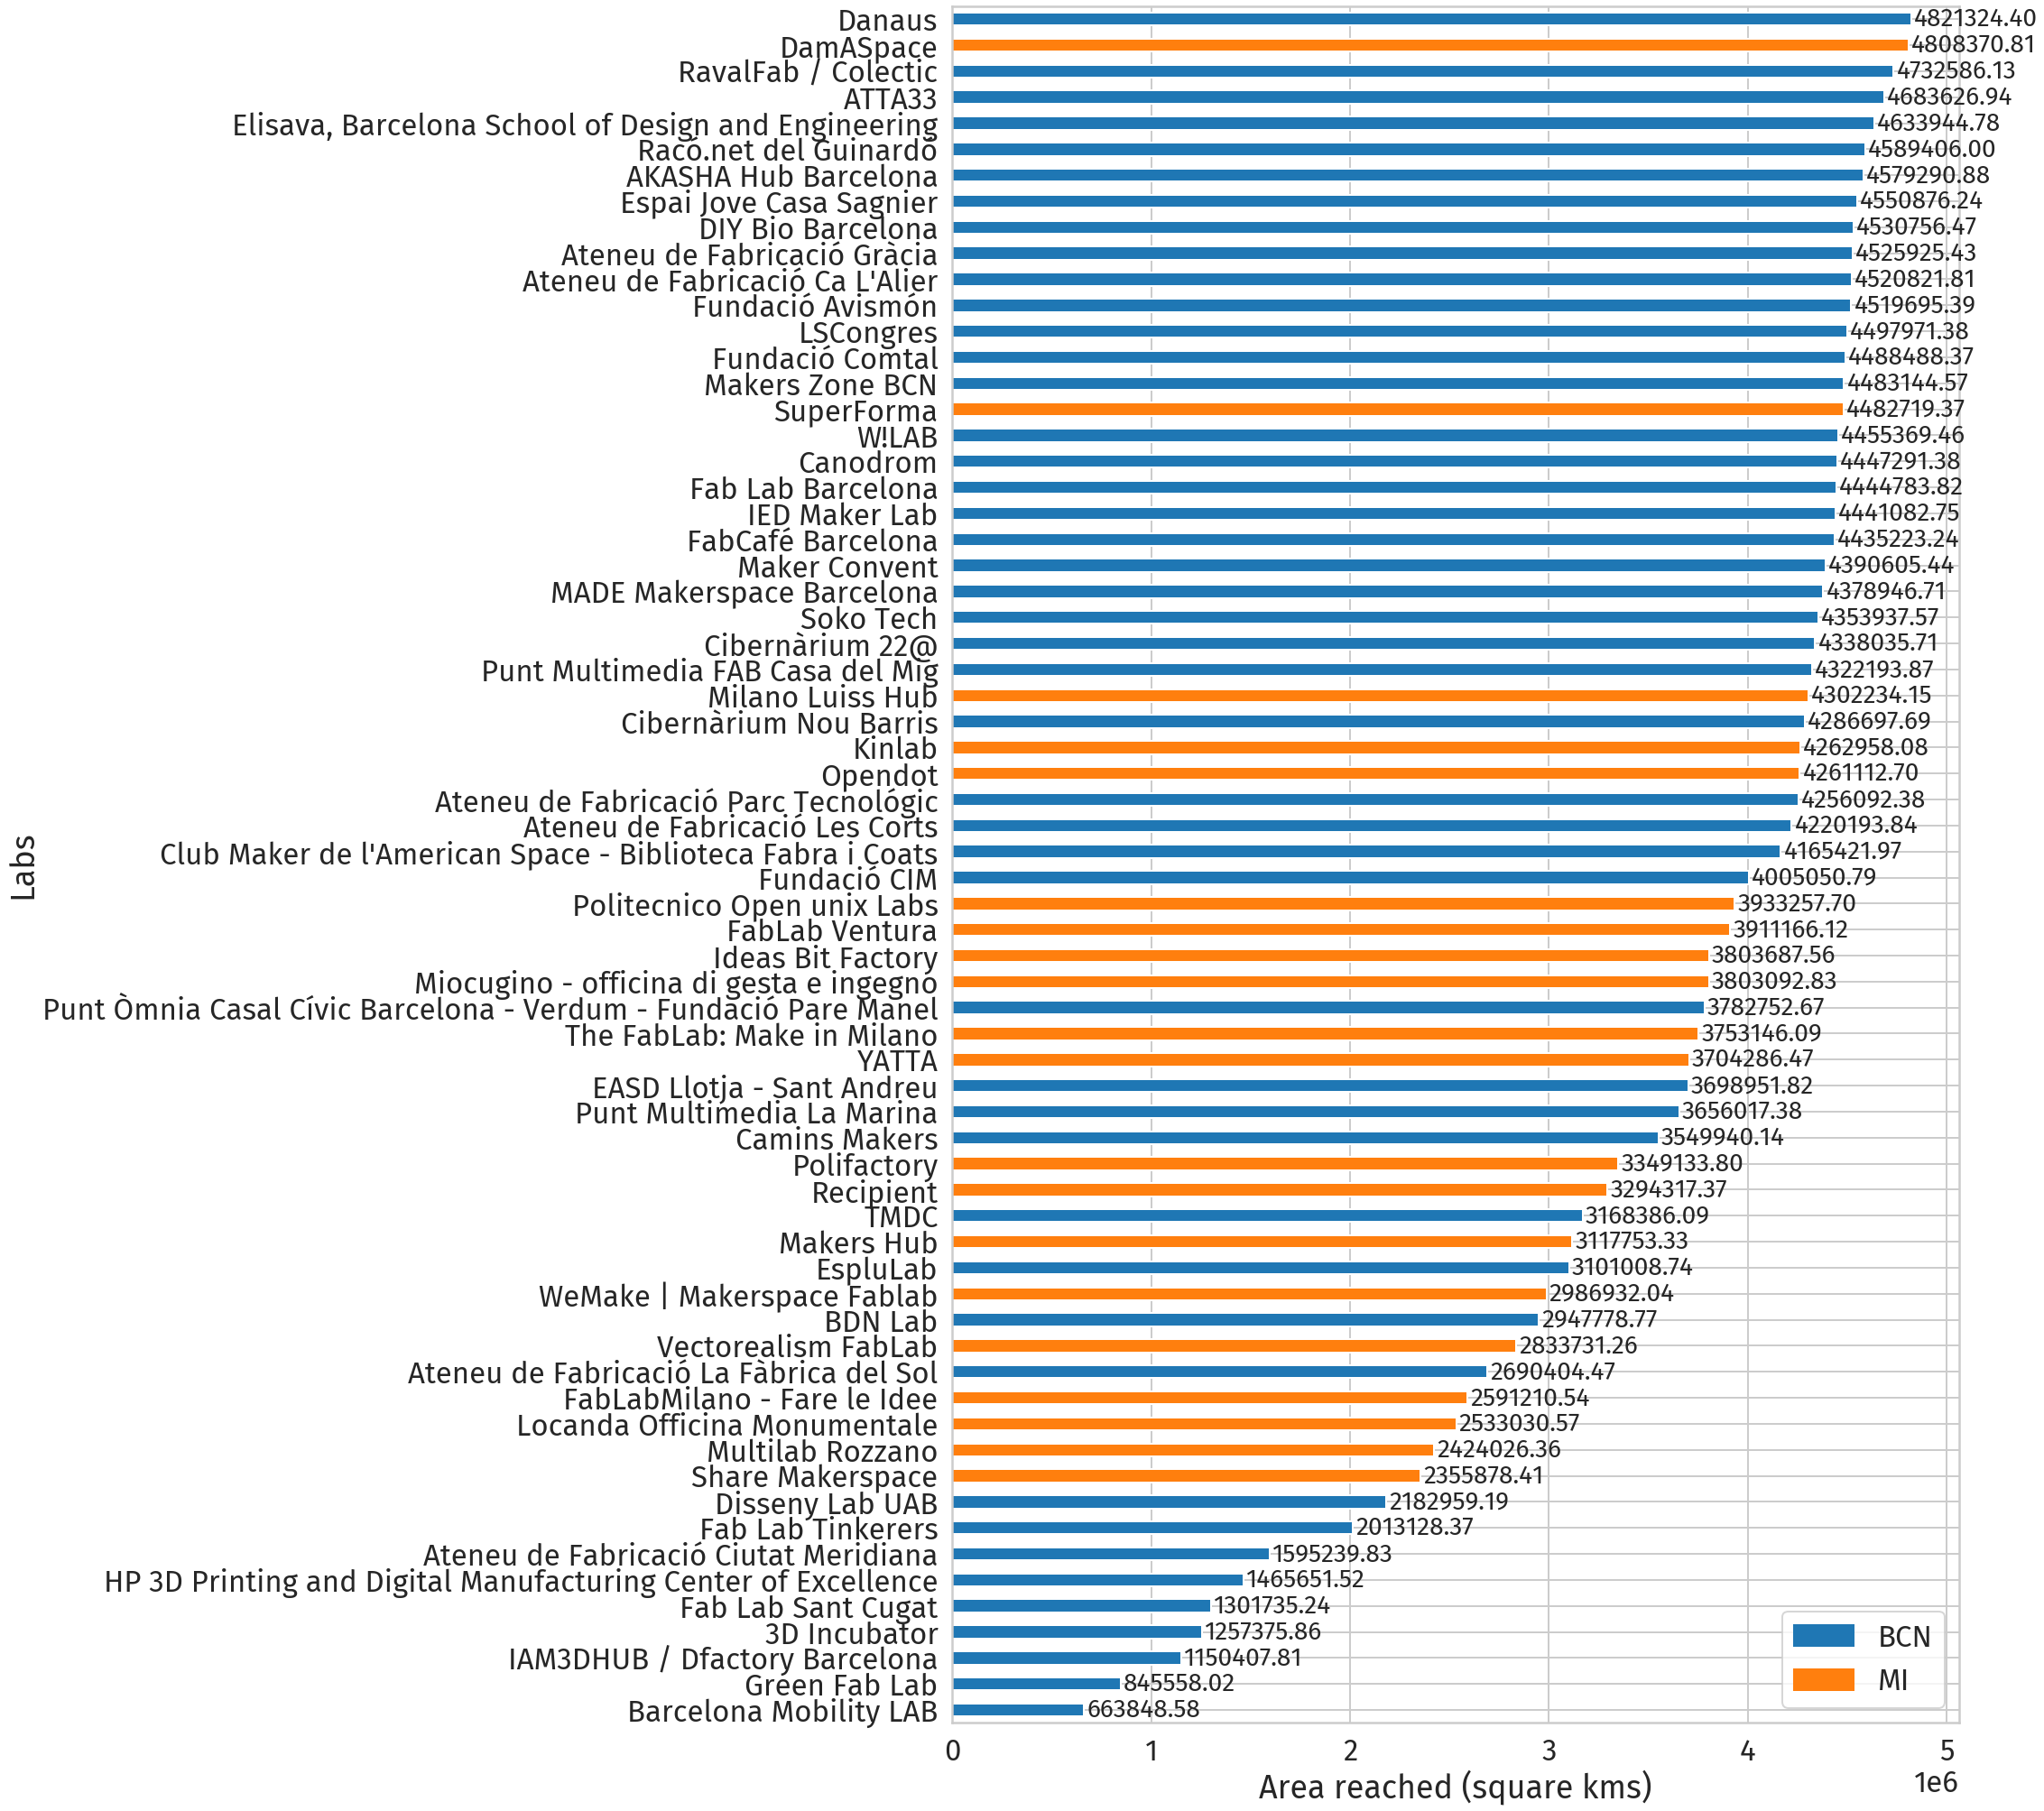

In [32]:
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['area'])['area'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['area'])['Cluster']], figsize=(20,35), legend=True)
ax.bar_label(ax.containers[0], fmt="%.2f", size=28, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Area reached (square kms)')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_area_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_area_grouped_bar.png", dpi=300, bbox_inches="tight")

plot the data

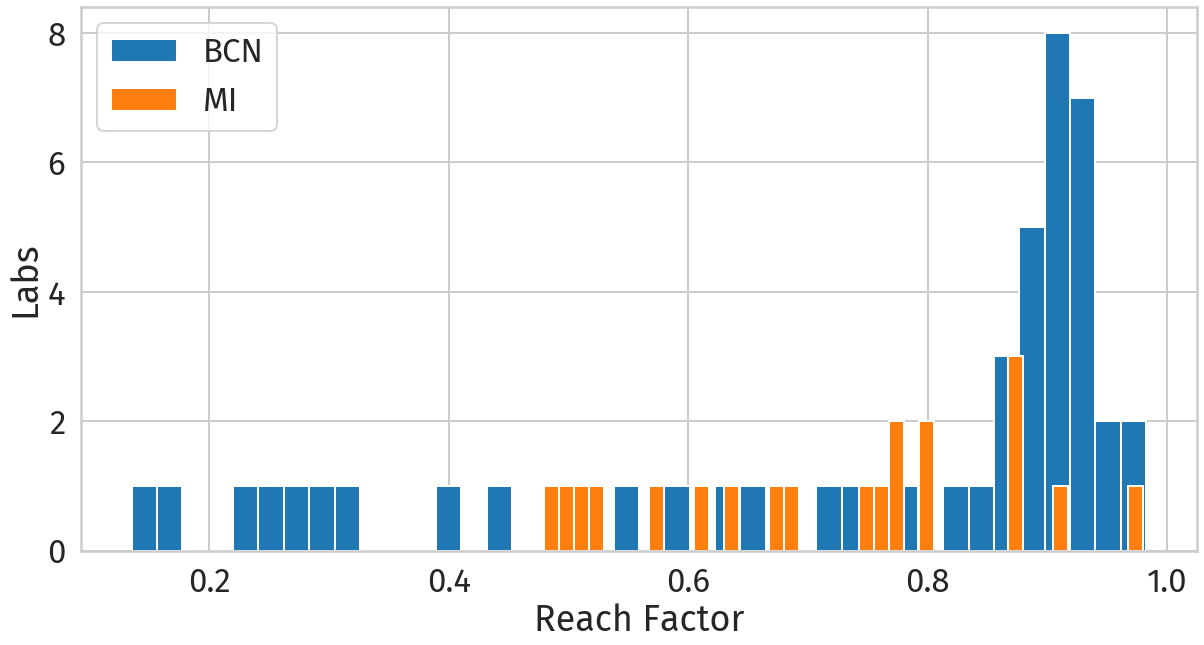

In [33]:
full_map_data.groupby("Cluster")["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_reachfactor_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_reachfactor_grouped_hist.png", dpi=300, bbox_inches="tight")

plot the data

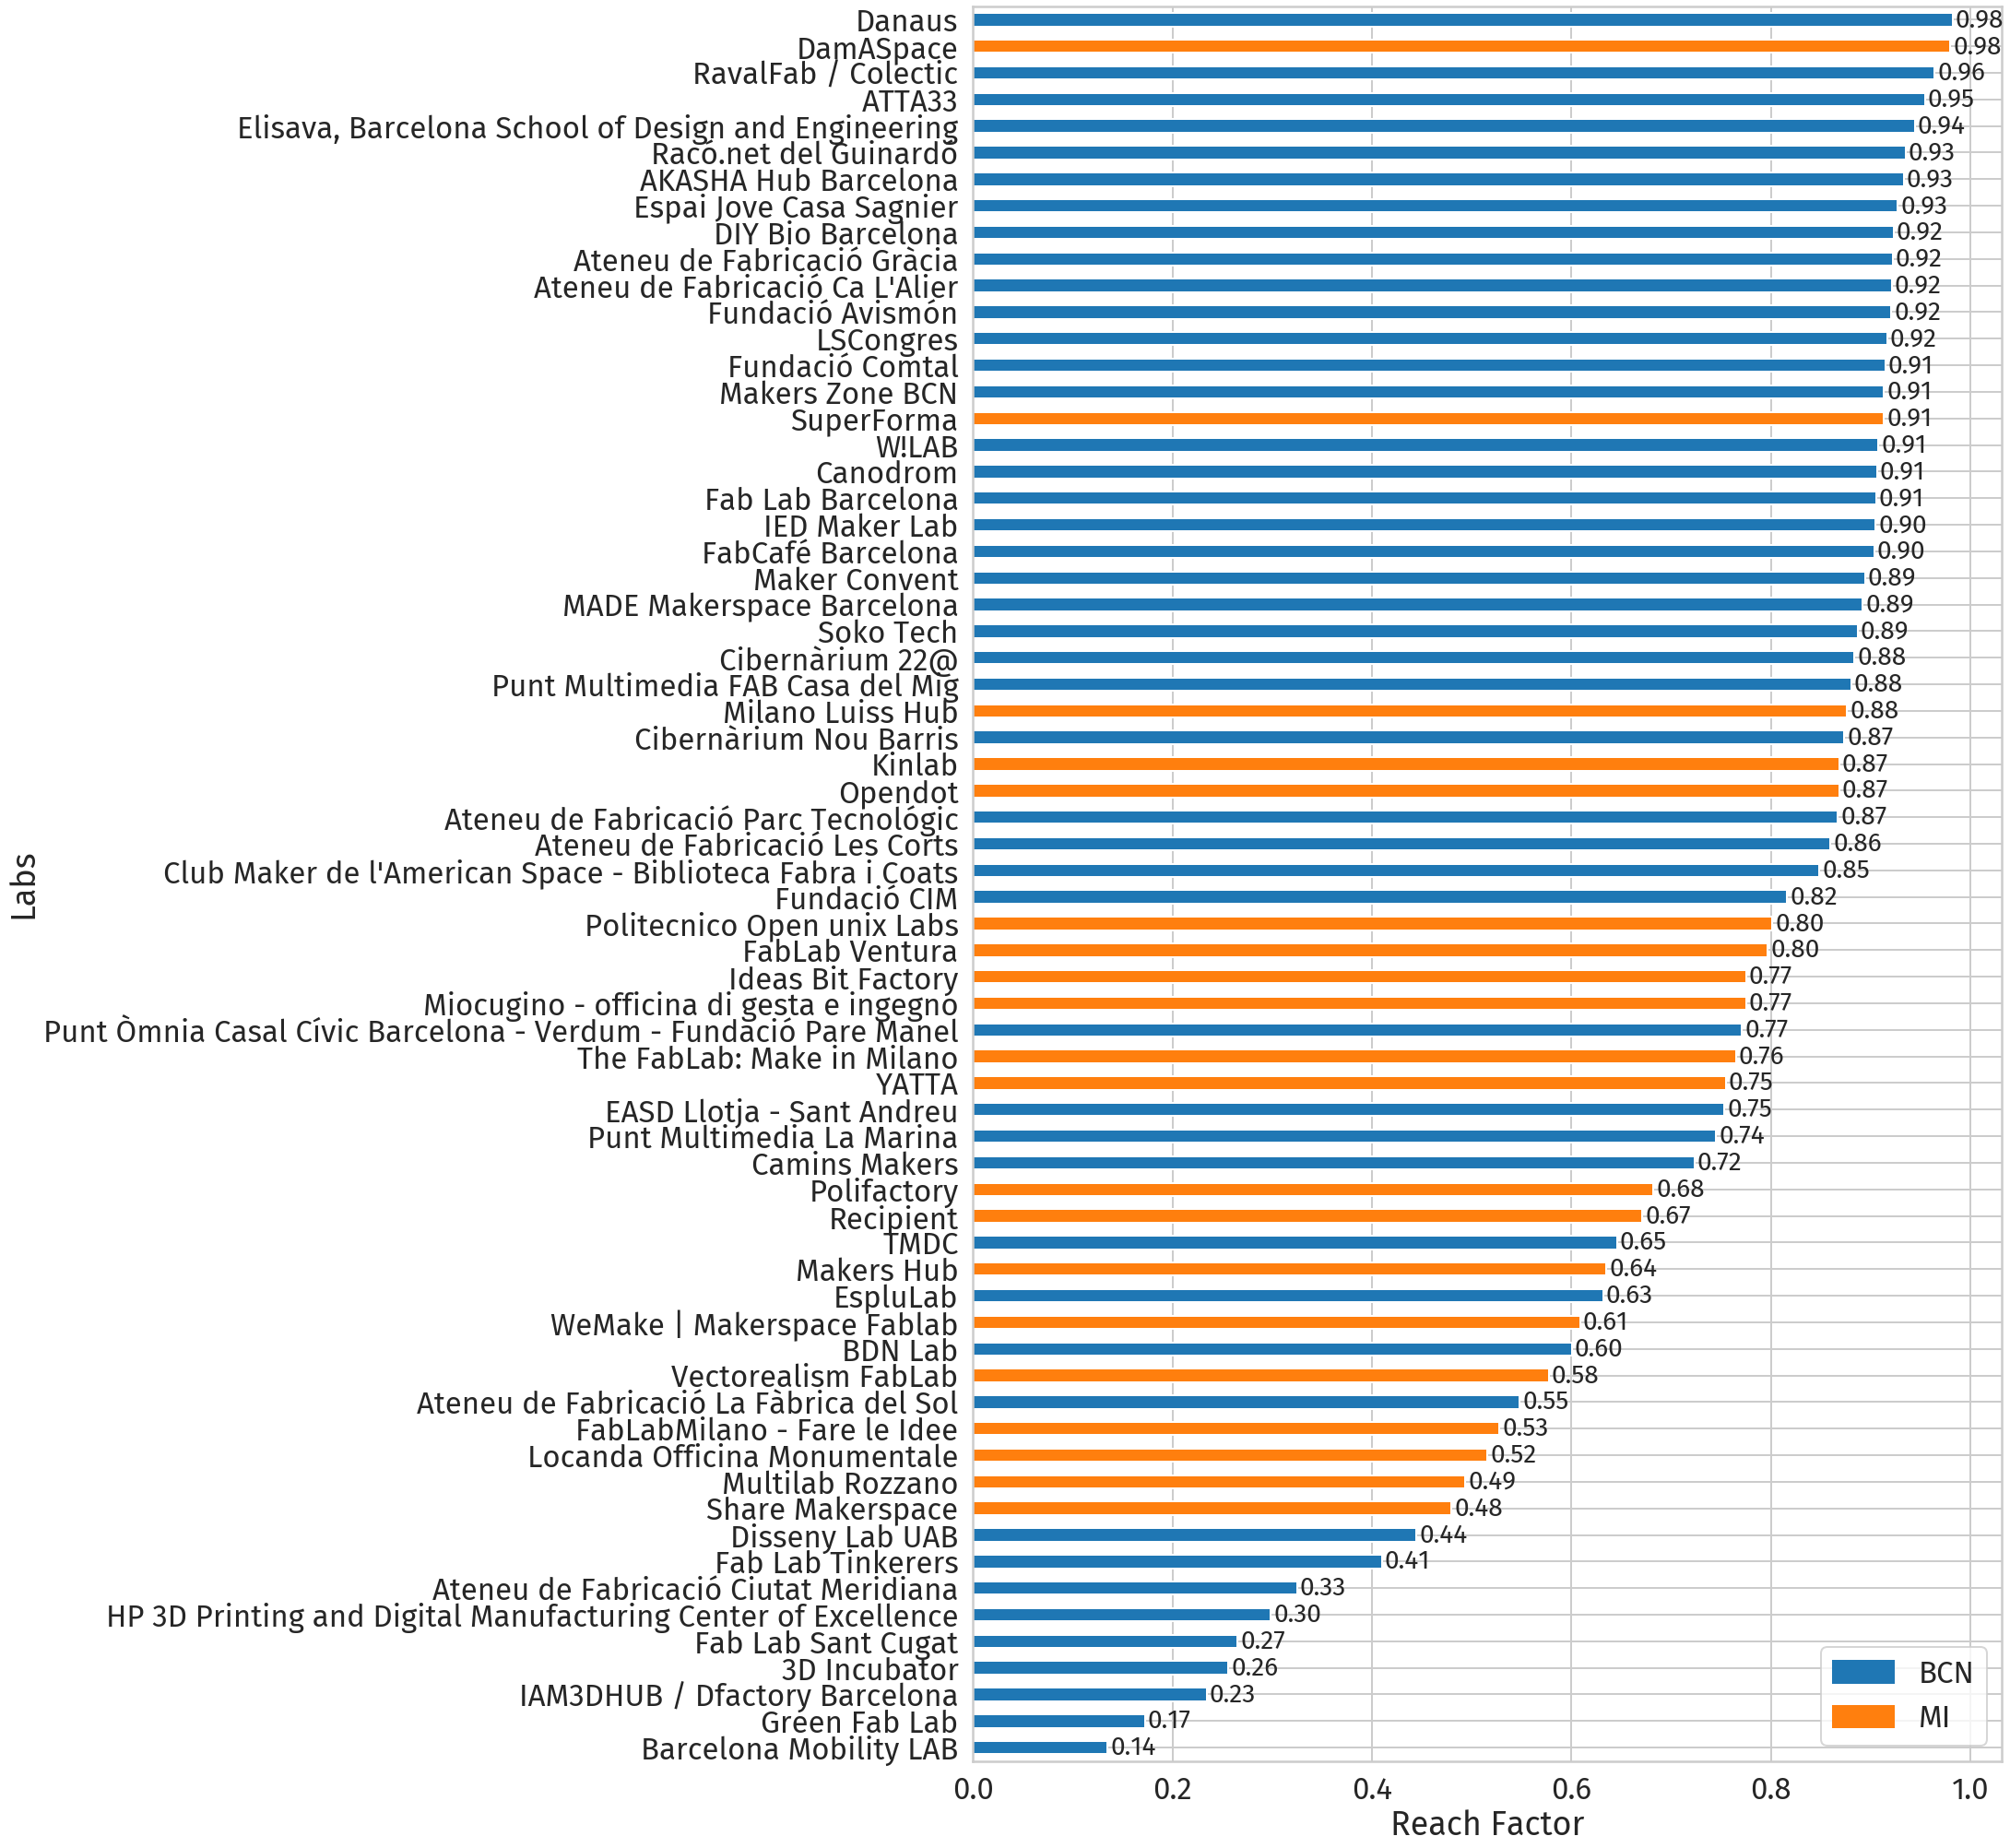

In [34]:
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['reachfactor'])['Cluster']], figsize=(20,35), legend=True)
ax.bar_label(ax.containers[0], fmt="%.2f", size=28, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_reachfactor_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_reachfactor_grouped_bar.png", dpi=300, bbox_inches="tight")

### Isochrones

create the map

In [35]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [36]:
for iso in data:
  folium.GeoJson(iso, name="geojson").add_to(m)
for loc in locations:
  #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
  folium.Circle(
    radius=30,
    location=[locations[loc][1],locations[loc][0]],
    popup=loc,
    tooltip=loc,
    color="crimson",
    fill="crimson",
).add_to(m)


show the map

red points = labs<Br/>
blu lines = isocrones 15' for each lab as center

In [37]:
folium.LayerControl().add_to(m)
m

save the web map

In [38]:
m.save("html" + os.sep + "isochrones.html")

### Isochrones with color from population reached

create the legend with a graduated color scale (yellow less, blu more)

In [39]:
linear = cmp.LinearColormap(
    ['yellow', 'green', 'blue'],
    vmin=map_data['total_pop'].min(), vmax=map_data['total_pop'].max(),
    caption='Total population'
)
linear

create the map

In [40]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [41]:
for iso in data:
  fillColor = map_data.loc[iso["name"]]["total_pop"]
  folium.GeoJson(iso, 
                 name="geojson", 
                 style_function=lambda feature: {
                     "fillColor": linear(feature["properties"]["total_pop"]),
                     "fillOpacity": 0.3,
                     "color": "gray",
                     "weight": 1,
                     "dashArray": ''
                     },
                 ).add_to(m)

for loc in locations:
    #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
    folium.Circle(
        radius=30,
        location=[locations[loc][1],locations[loc][0]],
        popup=loc,
        tooltip=loc,
        fill=True,
        color="crimson",
        fillColor="crimson"
    ).add_to(m)

folium.LayerControl().add_to(m)
m.add_child(linear)

save the map

In [42]:
m.save("html" + os.sep + "isochrones_popcolor.html")

add labels to the map

In [43]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

for iso in data:
  fillColor = map_data.loc[iso["name"]]["total_pop"]
  folium.GeoJson(iso, 
                 name="geojson", 
                 style_function=lambda feature: {
                     "fillColor": linear(feature["properties"]["total_pop"]),
                     "fillOpacity": 0.3,
                     "color": "gray",
                     "weight": 1,
                     "dashArray": ''
                     },
                 ).add_to(m)

for loc in locations:
    #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
    folium.Circle(
        radius=30,
        location=[locations[loc][1],locations[loc][0]],
        popup=loc,
        tooltip=loc,
        fill=True,
        color="crimson",
        fillColor="crimson"
    ).add_to(m)
    folium.map.Marker(
        [locations[loc][1] + 0.0, locations[loc][0] - 0.0],
        icon=folium.features.DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="background-color: rgba(255, 255, 255, 0.75); padding: 5px; font-size: 10px; font-family:'+'Fira Sans;'+'">'+loc+'</div>',
        )
    ).add_to(m)

folium.LayerControl().add_to(m)
m.add_child(linear)

save the map

In [44]:
m.save("html" + os.sep + "isochrones_popcolor_labels.html")